In [73]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

import io
import json
import re

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics

In [74]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [75]:
stemmer = SnowballStemmer("russian")
stop_words = set(stopwords.words('russian'))

In [76]:
stop_words

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [77]:
with io.open('posts_comments_2_9k.json', encoding='utf-8') as json_data:
    comments = list()
    for line in json_data:
        comment = json.loads(line)['text'].lower()
        comment = re.sub('[,-]', ' ', comment)
        comment = re.sub('[!@#$&=_\?:\.\)\(\[\]|id"/]', '', comment)
        comment = re.sub(r'\d+', '', comment)
        comment = re.sub('[a-zA-Z]', '', comment)
        comment = word_tokenize(comment)
        comment = [word for word in comment if word not in stop_words]
        comment = [stemmer.stem(i) for i in comment]
        comment = " ".join(comment)
        comments.append(comment)
        
coments = [i for i in comments if i != '']

In [78]:
comments

['ван корн соглас большинств случа виноват пешеход езж год недел набега км имел пробл пешеход еха прав ряд прозева выходя фур старушк благ еха оттормоз незадач виноват водител фур закр знак пешеходн переход разметк прост стерл',
 'ван мотоцикл вес кг плюс плюс пассажир',
 'старушк буд выж ум выход фур снача показа аккуратн посмотрел останов шла',
 'алекс город гоня счита норм😃',
 'ед гольф лошадьм трасс част испытыва сложност обогна тихоход отказа лишн сотн',
 'алекс все куп хотел вполн довол плач рубл налог год кстат счита ком долж',
 'ван начина разниц случа дтп счита старушк выж ум счита соблюда п пдд имен учел дорожн обстановк переоцен сво возможн выбра неверн скоростн реж позвол избежа дтп',
 'ван тихоход эт скольк секрет',
 'ван например рул лет ваш стран точк зрен поддержива сегодн водител завтр пошел ребенк прогулк пешеходв передвига авт плач транспортн налог тысрубл возника желан ком рассказыва чьи дорог эт полн бред дорог стран общ транспортн налог покрыва стоимост ремонт про

In [79]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=10)
X_weighted = tfidf_vect.fit_transform(comments) 

In [80]:
from sklearn.cluster import KMeans

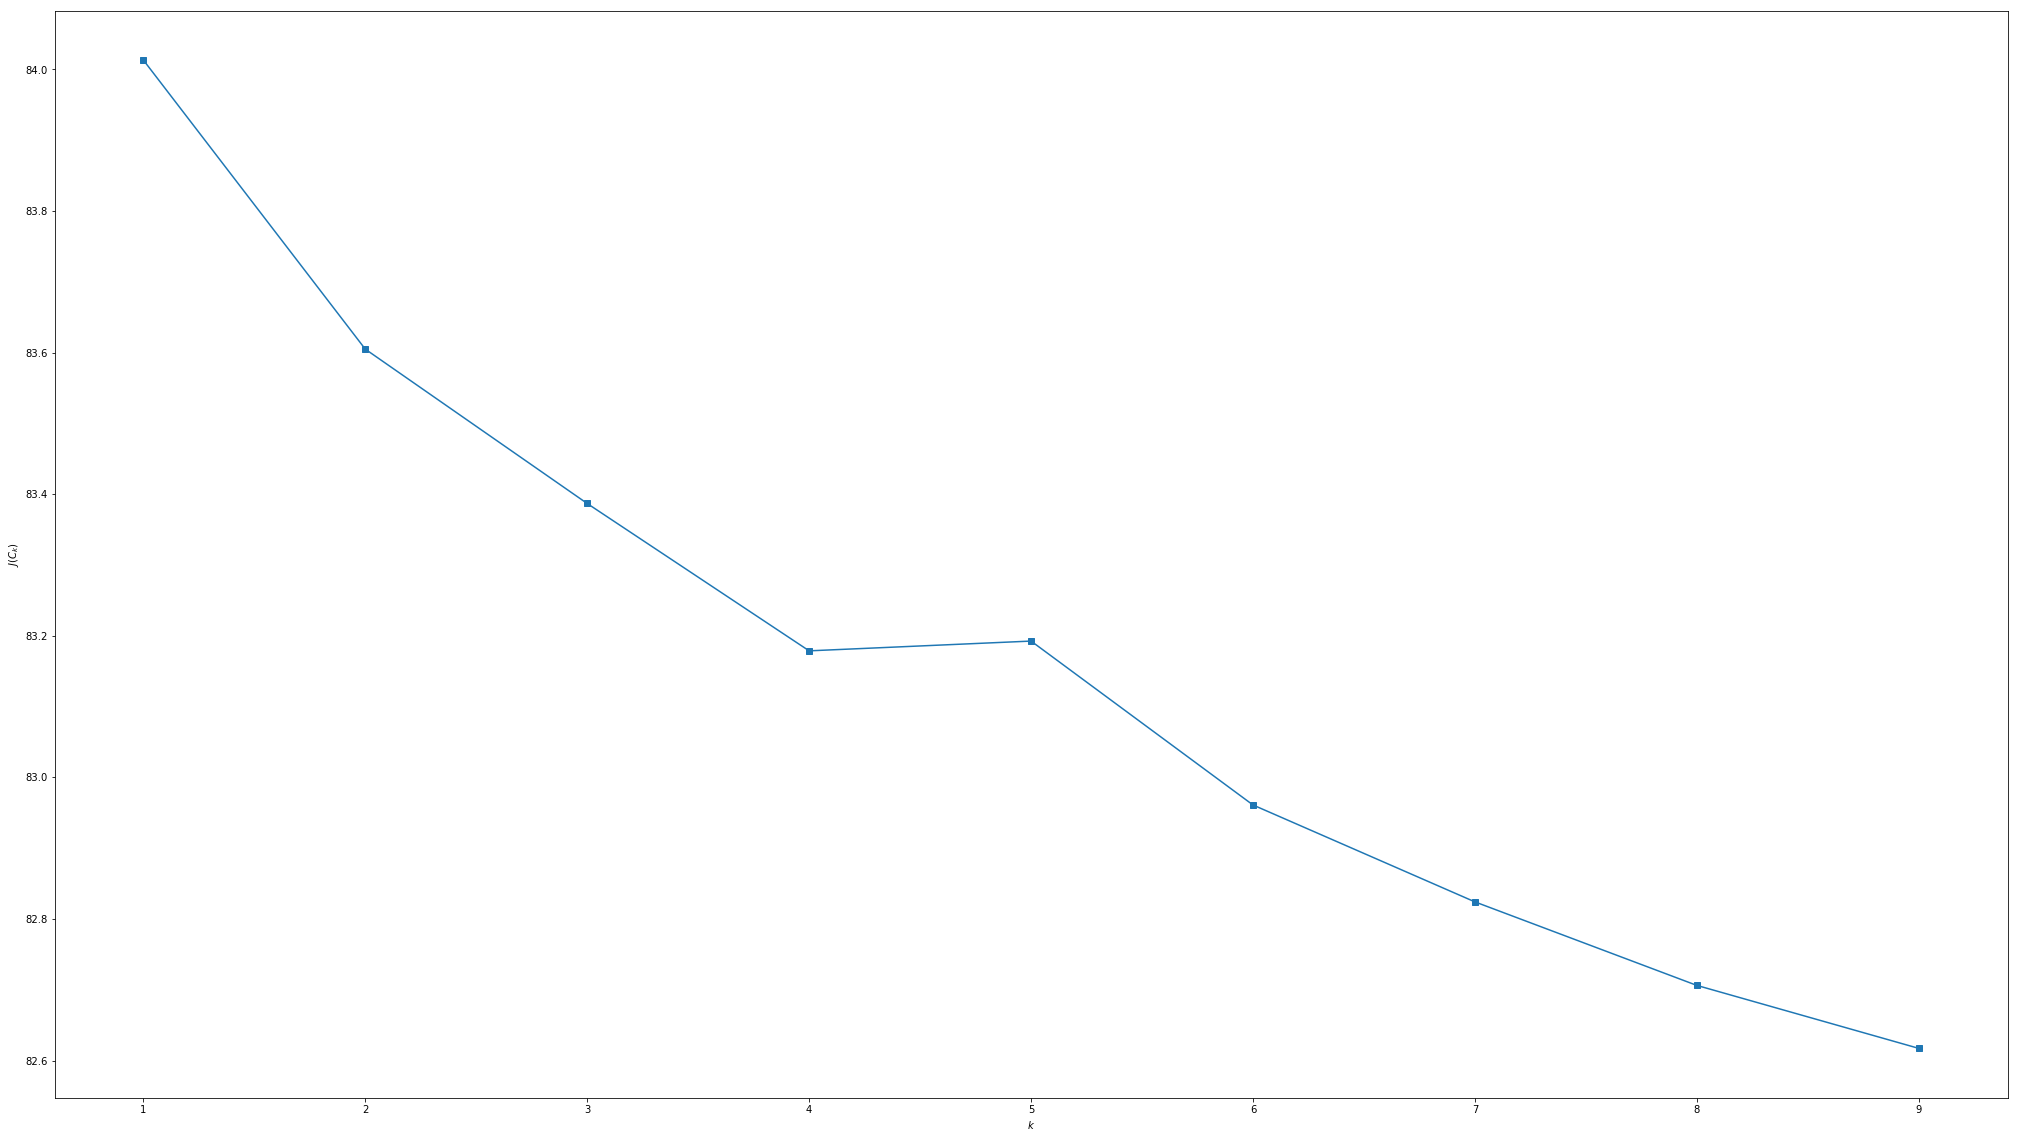

Wall time: 46.1 s


In [81]:
%%time

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_weighted)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 10), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

In [83]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
model.fit(X_weighted)
    
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 эт
 так
 александр
 алекс
 люд
 прав
 сво
 серг
 макс
 андр
Cluster 1:
 сто
 эт
 так
 нов
 двор
 машин
 прост
 трамва
 ещ
 скольк
Cluster 2:
 машин
 прост
 эт
 так
 трамва
 люд
 котор
 сво
 номер
 одн
Cluster 3:
 дмитр
 эт
 прям
 разворот
 всем
 пошл
 тонировк
 прав
 виде
 спб


In [84]:
metrics.silhouette_score(X_weighted, model.labels_)

0.041391710893485353

In [85]:
kmeans = KMeans(n_clusters=4).fit(X_weighted)

In [86]:
clusters = kmeans.labels_.tolist()
encoder = {
    0: '#0000FF',
    1: '#04B404',
    2: '#B40404',
    3: '#2E2E2E'
}
coloring = [encoder[i] for i in clusters]

In [87]:
from sklearn.decomposition import PCA

In [88]:
X_weighted_reduced = PCA(n_components=3).fit_transform(X_weighted.toarray())

In [89]:
x, y, z = X_weighted_reduced[:, 0], X_weighted_reduced[:, 1], X_weighted_reduced[:, 2]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    
    marker=dict(
        size=4,
        color=coloring,
        line=dict(
            color='rgba(217, 217, 217)',
            width=1
        ),
        opacity=1
    )
)


data = [trace1]
layout = go.Layout(
    title='PCA with 3 PCs',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [90]:
#Hierarchy
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X_weighted)

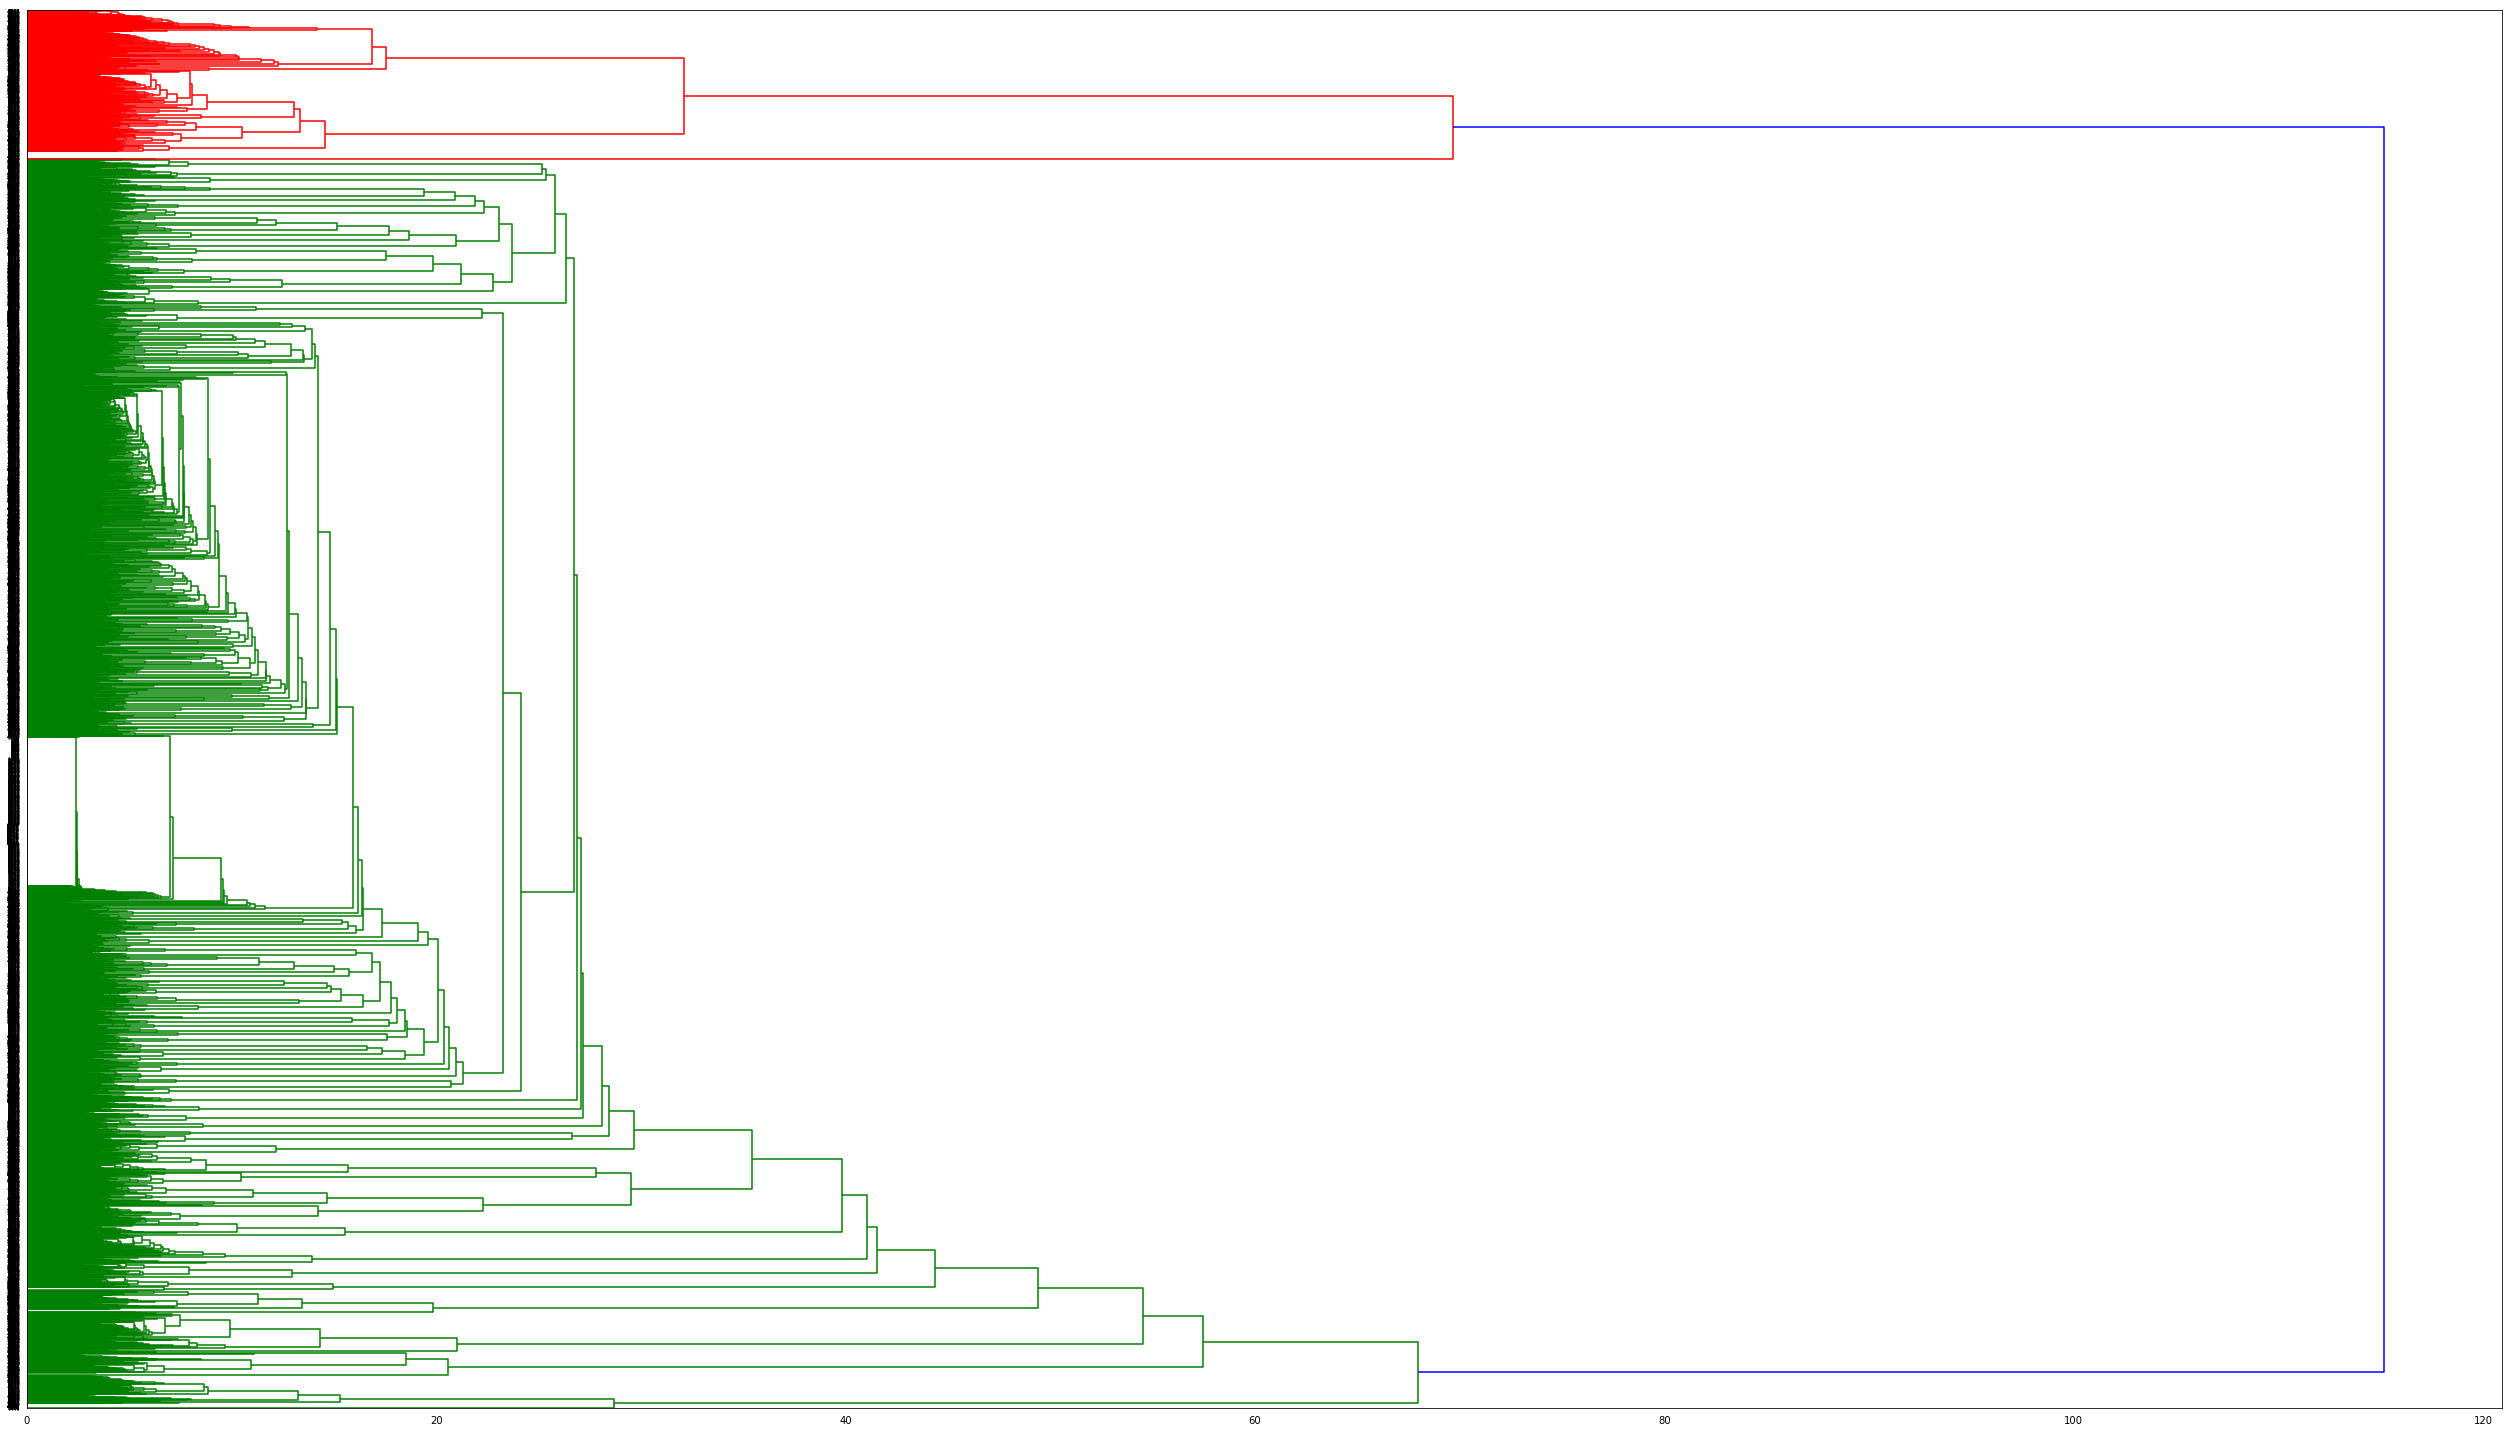

In [104]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(35, 20)) 
ax = dendrogram(linkage_matrix, orientation="right")

plt.tick_params(\
    axis= 'x',         
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='on')

plt.tight_layout() 
plt.show()

In [91]:
from sklearn.cluster import AgglomerativeClustering

In [93]:
aggl = AgglomerativeClustering(n_clusters=4)
aggl.fit(X_weighted.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x00000170CD3C7378>)

In [94]:
metrics.silhouette_score(X_weighted, aggl.labels_)

0.028640014642876712

In [95]:
x = pd.DataFrame({'comment':comments, 'cluster':aggl.labels_})
print(x)

      cluster                                            comment
0           0  ван корн соглас большинств случа виноват пешех...
1           0             ван мотоцикл вес кг плюс плюс пассажир
2           0  старушк буд выж ум выход фур снача показа акку...
3           0                       алекс город гоня счита норм😃
4           0  ед гольф лошадьм трасс част испытыва сложност ...
5           0  алекс все куп хотел вполн довол плач рубл нало...
6           0  ван начина разниц случа дтп счита старушк выж ...
7           0                       ван тихоход эт скольк секрет
8           0  ван например рул лет ваш стран точк зрен подде...
9           0  фур едут трасс зачаст хот город реж молч погре...
10          0  стас удар сильн бок скат капот наде ушиб обошл...
11          0  перечита поймет защища водител дан случа описы...
12          0                                        капита плат
13          0  александр экипаж написа позвон поеха информац ...
14          0  ком интере

In [96]:
fst = x[x.cluster==1]
scnd = x[x.cluster==2]
thrd = x[x.cluster==3]
frth = x[x.cluster==0]

In [97]:
comments1 = list()
comments2 = list()
comments3 = list()
comments4 = list()
for line in fst.comment:
    comments1.append(line)
    
for line in scnd.comment:
    comments2.append(line)
    
for line in thrd.comment:
    comments3.append(line)
    
for line in frth.comment:
    comments4.append(line)

In [102]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=3)
tfidf_matr1 = tfidf_vectorizer.fit_transform(comments1)  
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
features = tfidf_vectorizer.get_feature_names()
top_n = 10
tf = [features[i] for i in indices[:top_n]]
print(tf)

['эт']


In [103]:
tfidf_matr2 = tfidf_vectorizer.fit_transform(comments2)
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
features = tfidf_vectorizer.get_feature_names()
top_n = 10
tf = [features[i] for i in indices[:top_n]]
print(tf)

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [100]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
tfidf_matr3 = tfidf_vectorizer.fit_transform(comments3)
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
features = tfidf_vectorizer.get_feature_names()
top_n = 10
tf = [features[i] for i in indices[:top_n]]
print(tf)

['калифорн']


In [101]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=10)
tfidf_matr4 = tfidf_vectorizer.fit_transform(comments4)
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
features = tfidf_vectorizer.get_feature_names()
top_n = 10
tf = [features[i] for i in indices[:top_n]]
print(tf)

['оправдан', 'срок', 'естествен', 'нахр', 'способн', 'непонятн', 'друз', 'нрав', 'сообщ', 'обгон']
